In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyter_server.log import log_request
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_gamma_deviance, confusion_matrix, accuracy_score, \
    classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

### Load the dataset and check the first few samples for information

In [4]:
# Read the dataset
data = pd.read_csv('data/data.csv')
df = data.copy()

# Display the top 5 rows of the dataset
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Check the data's shape, description, feature information and various other feature aspects (eg. numerical vs categorical etc.)

In [5]:
data.shape

# There are 33 features and 569 samples in the dataset

(569, 33)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


#### Only categorical feature is an object 'M' which has values B and M standing for 'Benign' and 'Malignant' respectively

In [9]:
data.nunique()

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [10]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [11]:
# Check for missing values and print them out in a table

total_missing = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(25)

,Total,%
Unnamed: 32,569,100.0
id,0,0.0
diagnosis,0,0.0
texture_mean,0,0.0
radius_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
perimeter_mean,0,0.0
concave points_mean,0,0.0


In [12]:
# Split into X & y with X including our features & y including our prediction labels

y = data.diagnosis
droplist = ['id', 'Unnamed: 32', 'diagnosis']
x = data.drop(droplist,axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.value_counts()

,count
diagnosis,
B,357
M,212


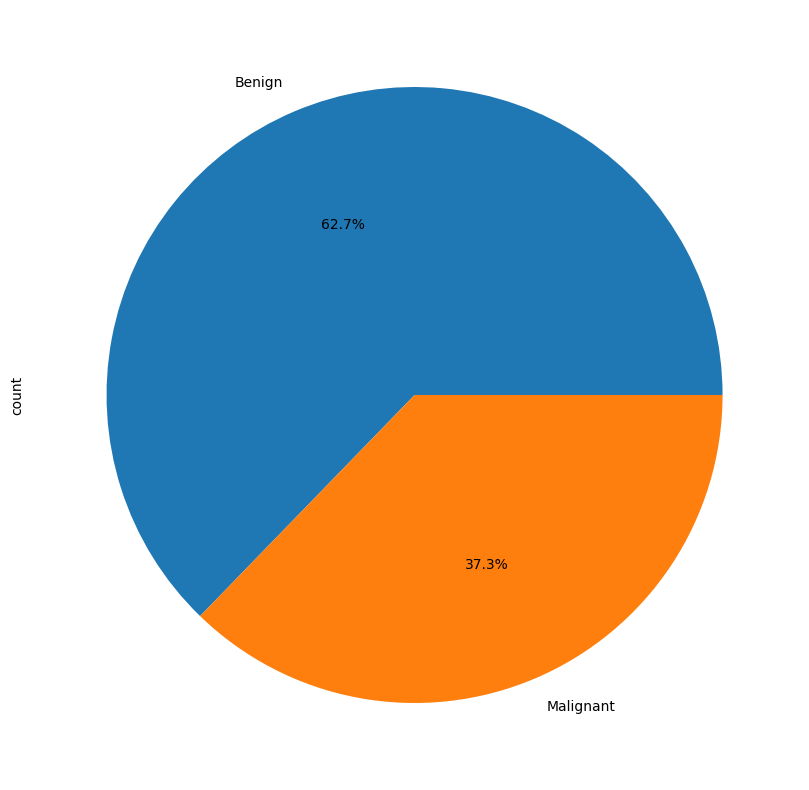

In [14]:
#### Visualize the distribution of B vs M in a pie chart.

piechart_labels = ['Benign', 'Malignant']

plt.figure(figsize=(10,10))
y.value_counts().plot.pie(autopct='%1.1f%%', labels = piechart_labels)
plt.savefig('data/images/piechart_of_labelled_data.png',dpi=100,bbox_inches = 'tight')
plt.show()

Number of benign:  357
Number of malignant :  212


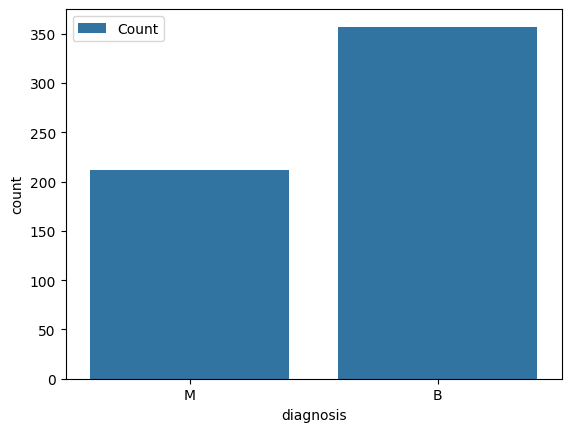

In [15]:
ax = sns.countplot(x=y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of benign: ',B)
print('Number of malignant : ',M)
plt.savefig('data/images/countplot_of_labelled_data.png',dpi=100,bbox_inches = 'tight')
plt.show()

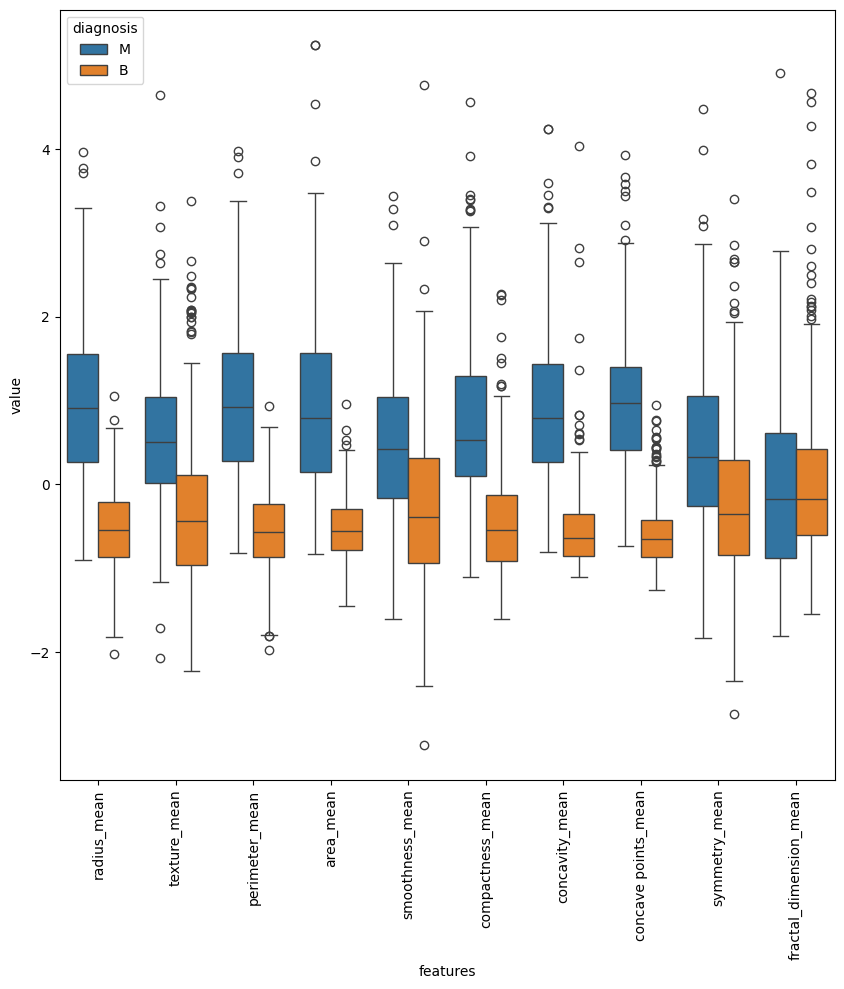

In [16]:
# Because the values of the features are on multiple different scales, lets create a standardized version of the dataframe

data_diagnosis = y
data = x

data_normalized = (data - data.mean()) / (data.std())

data = pd.concat([y,data_normalized.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.savefig('data/images/boxplot_of_labelled_data_0-10.png',dpi=100,bbox_inches = 'tight')
plt.xticks(rotation=90)
plt.show()

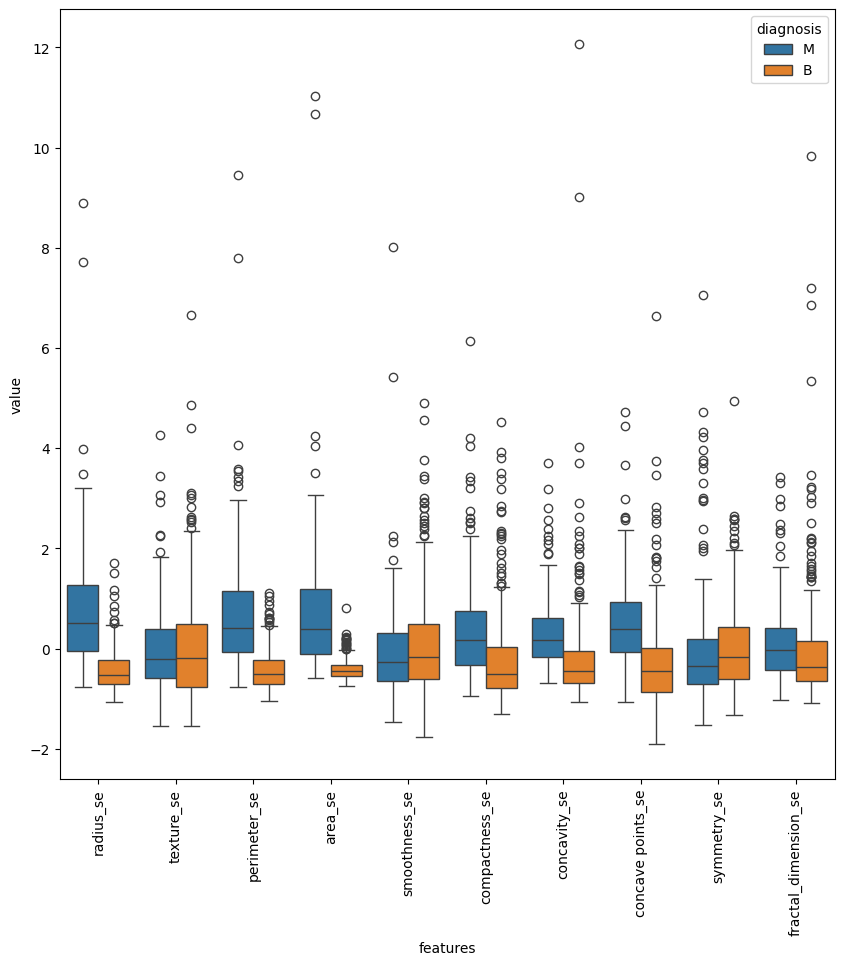

In [17]:
data = pd.concat([y,data_normalized.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.savefig('data/images/boxplot_of_labelled_data_10-20.png',dpi=100,bbox_inches = 'tight')
plt.xticks(rotation=90)
plt.show()

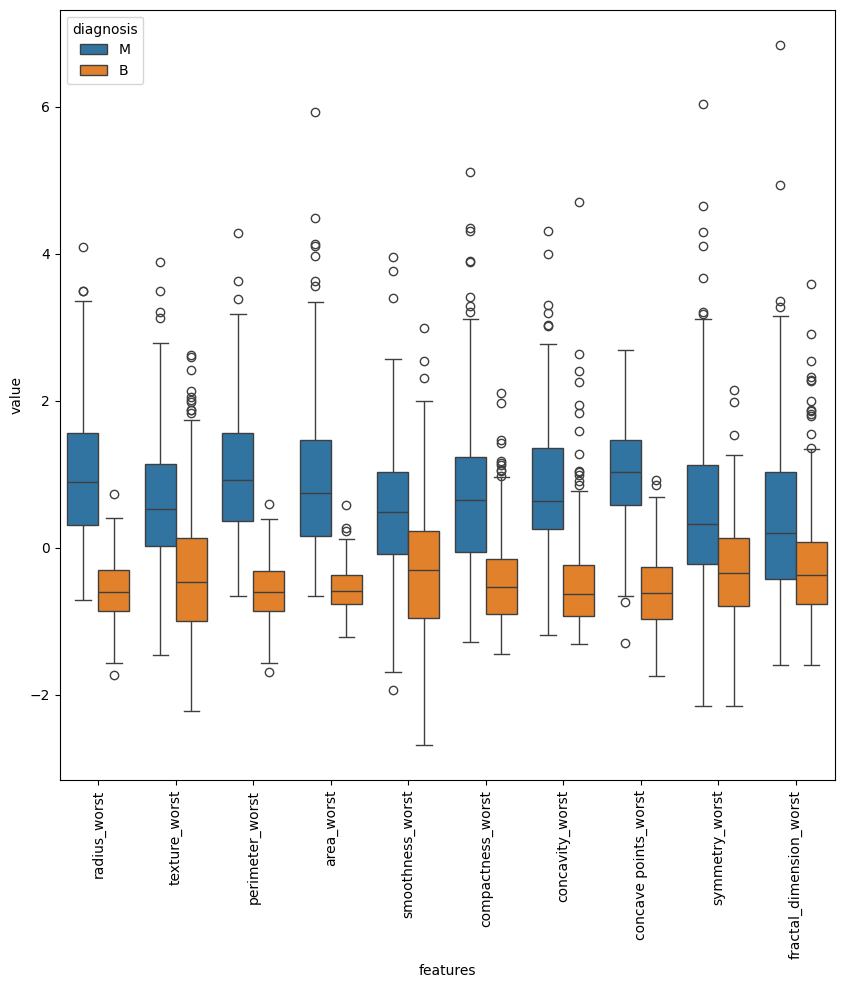

In [18]:
data = pd.concat([y,data_normalized.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.savefig('data/images/boxplot_of_labelled_data_20-30.png',dpi=100,bbox_inches = 'tight')
plt.xticks(rotation=90)
plt.show()

In [19]:
# There are some obvious indicative differences between the features that correlate to the diagnosis. Egs are area, concavity, perimeter & radius

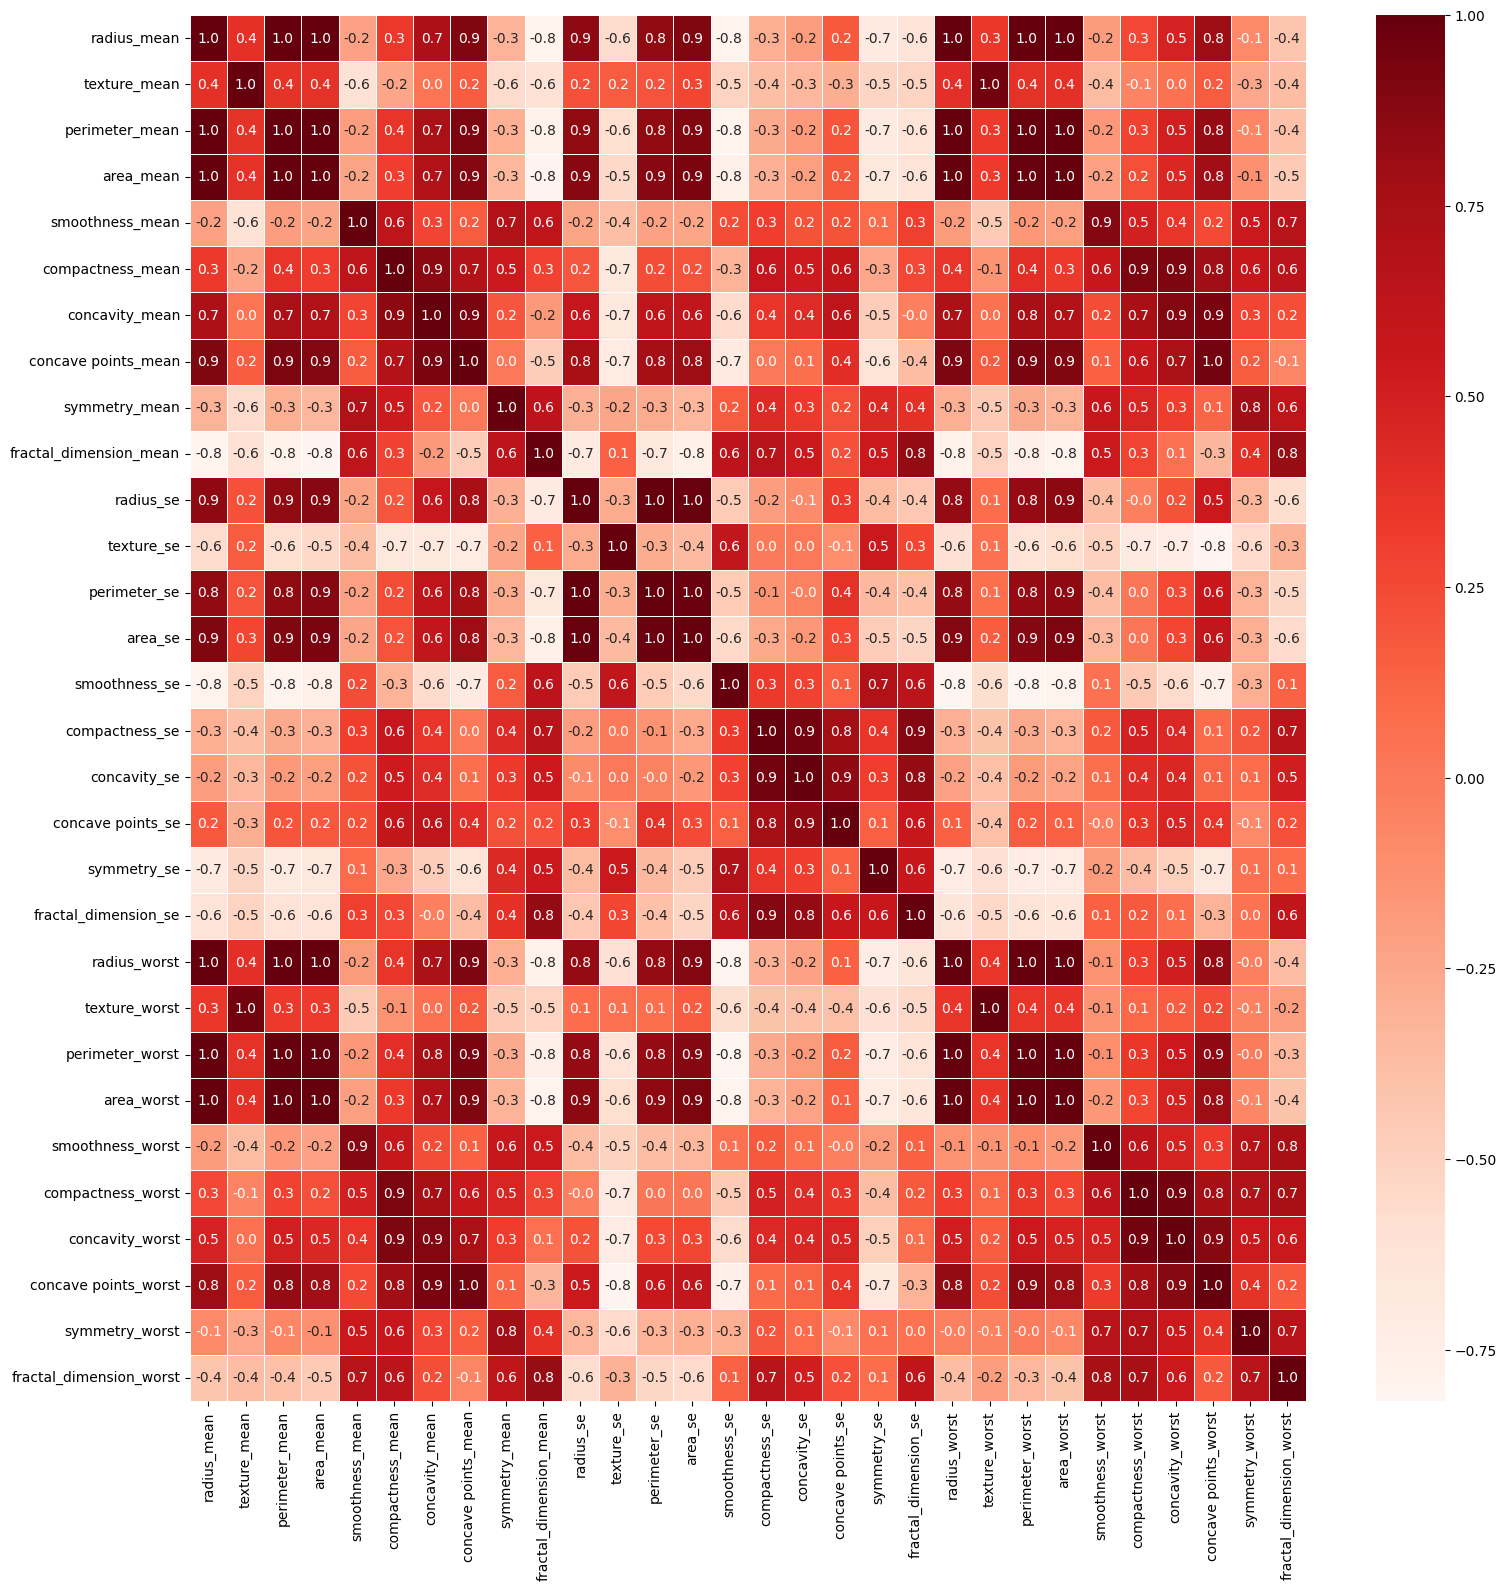

In [20]:
#missing_data.head(25)
# Display correlation matrix for values that are of dtype int64 only.
# Drop the id column from the dataframe as that's not meaningful for correlation or the business intent

corrmatrix = x.corr(numeric_only=True)

# Visualize correlation matrix in heatmap.

f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrmatrix.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='Reds')
plt.savefig('data/images/corr_matrix.png',dpi=100,bbox_inches = 'tight')

# Modelling - Define data splits

In [21]:
# Define X & Y with the original copy of the dataset that we made. This way we do not need to worry about any modifications we may have made during EDA

# Define a drop list with the features we know we do not want
droplist_2 = ['id', 'Unnamed: 32', 'diagnosis']

# Define X as the dataset we work with
X = df.drop(droplist_2, axis=1)

# Define Y as the target predictor
y = df['diagnosis']

In [22]:
# Define train, test, split ratios with X & y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling - Standardization

In [23]:
# Initialize StandardScaler to standardize the training and testing features

scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Modelling - PCA

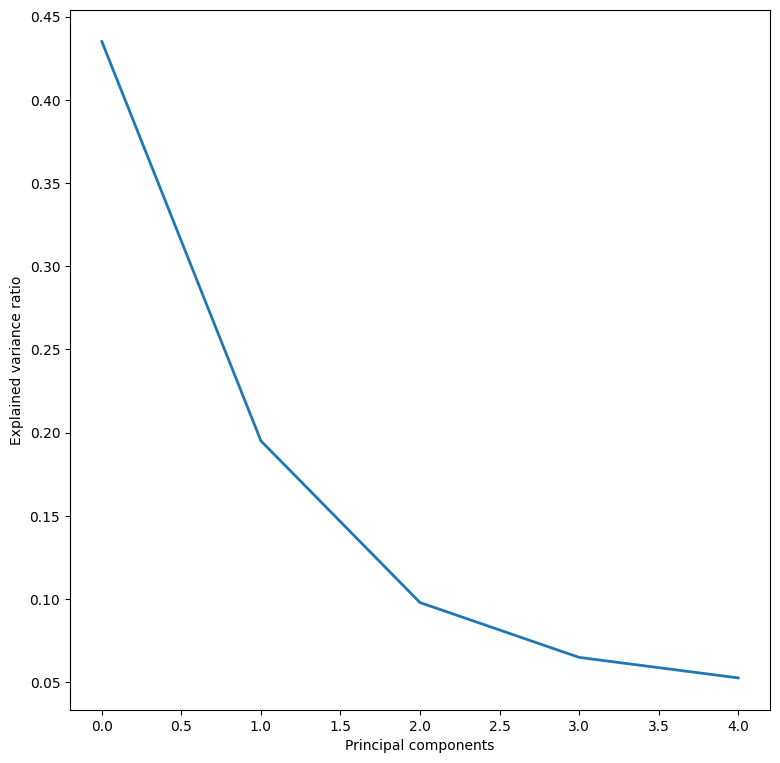

In [24]:
pca = PCA(n_components=5)
pca.fit(X_train_scaled)

plt.figure(1, figsize=(10, 10))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.savefig('data/images/principle_component_plot.png',dpi=100,bbox_inches = 'tight')
plt.show()

# Modelling - LogisticRegression

In [25]:
# Create a LogisticRegression instance

log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [26]:
# Initialize parameter grid for LogisticRegression model for use with GridSearchCV

param_grid_logreg = { 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver':['liblinear','lbgfs']}

In [27]:
# Run GridSearchCV with LogisticRegression model
grid_search_logreg = GridSearchCV(log_reg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train_scaled, y_train)

# Check for best estimator and define that as the best LogisticRegression estimator + print
best_logreg = grid_search_logreg.best_estimator_
best_logreg

LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')

In [28]:
# Make predictions with LogisticRegression model

y_pred_logreg = best_logreg.predict(X_test_scaled)
y_prob_logreg = best_logreg.predict_proba(X_test_scaled)[:,1]

In [29]:
# Check CV scores for LogisticRegression model

cv_scores_logreg = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Logistic Regression CV score: {cv_scores_logreg}")
print(f"Logistic Regression Mean CV accuracy: {cv_scores_logreg.mean():.4f} (+/- {cv_scores_logreg.std() * 2:.4f})")

Logistic Regression CV score: [0.98901099 0.96703297 0.98901099 0.97802198 0.96703297]
Logistic Regression Mean CV accuracy: 0.9780 (+/- 0.0197)


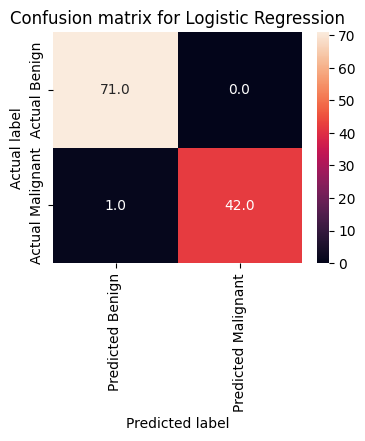

In [39]:
# Confusion matrices

fig, ax = plt.subplots(1, 1, figsize=(4,3))
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='.1f', ax=ax, xticklabels=['Predicted Benign', 'Predicted Malignant'], yticklabels=['Actual Benign', 'Actual Malignant'])
ax.set_title('Confusion matrix for Logistic Regression')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.savefig('data/images/confusion_matrices.png',dpi=100,bbox_inches = 'tight')
plt.show()